## Data Science Capstone Project

# Real Estate.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
train_df=pd.read_csv('train-RE.csv')

In [3]:
test_df=pd.read_csv('test-RE.csv')

In [4]:
train_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [5]:
test_df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [6]:
#checking shape of dataset
train_df.shape, test_df.shape

((27321, 80), (11709, 80))

## Figure out the primary key and look for the requirement of indexing

In [7]:
#Checking duplicate records
print('Duplicates in training dataset :')
print(train_df.duplicated().value_counts(),'\n')

print('Duplicates in testing dataset :')
print(test_df.duplicated().value_counts(),'\n')

Duplicates in training dataset :
False    27161
True       160
dtype: int64 

Duplicates in testing dataset :
False    11677
True        32
dtype: int64 



In [8]:
# Removing the duplicates from the dataset

train_df.drop_duplicates(keep = 'first', inplace=True)
test_df.drop_duplicates(keep = 'first', inplace=True)

In [9]:
# checking shape of dataset after removing duplicates
train_df.shape, test_df.shape

((27161, 80), (11677, 80))

In [10]:
#Checking Unique value for primary key
train_df.nunique()==train_df.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

In [11]:
test_df.nunique()==test_df.shape[0]

UID             True
BLOCKID        False
SUMLEVEL       False
COUNTYID       False
STATEID        False
               ...  
pct_own        False
married        False
married_snp    False
separated      False
divorced       False
Length: 80, dtype: bool

In [12]:
train_df.nunique()

UID            27161
BLOCKID            0
SUMLEVEL           1
COUNTYID         296
STATEID           52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 80, dtype: int64

###  Since UID has all unique values and it matches the number of rows, UID can be used as the primary key in the data set

## Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [13]:
train_df.isnull().sum()

UID                0
BLOCKID        27161
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          207
married          150
married_snp      150
separated        150
divorced         150
Length: 80, dtype: int64

In [14]:
test_df.isnull().sum()

UID                0
BLOCKID        11677
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          112
married           77
married_snp       77
separated         77
divorced          77
Length: 80, dtype: int64

In [15]:
# Block ID column has all missing values, and SUMLEVEL and primary each have single value, thus dropping them

train_df.drop(columns=['BLOCKID', 'SUMLEVEL','primary'], axis = 1, inplace=True)
test_df.drop(columns=['BLOCKID', 'SUMLEVEL','primary'], axis = 1, inplace=True)

In [16]:
train_df.shape, test_df.shape

((27161, 77), (11677, 77))

In [17]:
train_df['data_type'] = 'Train'
test_df['data_type'] = 'Test'

In [18]:
#Combining datasets
combined_df = train_df.append(test_df, ignore_index=True)

In [19]:
combined_df.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type  zip_code  area_code  ...  female_age_median  \
0        Hamilton   City     13346        315  ...           45.33333   
1        Roseland   City     46616        574  ...           37.58333   
2        Danville   City     46122        317  ...           42.83333   
3        Guaynabo  Urban       927        787  ...           50.58333   
4  Manhattan City   City     66502        785  ...           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  data_type  
0  0.57851      0.01882    0.01240   0.08770      Train  
1  0.34886      0.01426    0.01426   0.09030      Train  
2  0.64745      0.02830    0.01607   0.10657      Train  
3  0.47257      0.02021    0.02021   0.10106      Train  
4  0.12356      0.00000    0.00000   0.03109      Train  

[5 rows x 78 columns]

In [20]:
combined_df.shape

(38838, 78)

In [21]:
# checking percentage of missing values

(combined_df.isna().sum()/len(combined_df))*100

UID            0.000000
COUNTYID       0.000000
STATEID        0.000000
state          0.000000
state_ab       0.000000
                 ...   
married        0.584479
married_snp    0.584479
separated      0.584479
divorced       0.584479
data_type      0.000000
Length: 78, dtype: float64

In [22]:
col_check = combined_df.isna().sum().to_frame().reset_index()
col_check

index    0
0           UID    0
1      COUNTYID    0
2       STATEID    0
3         state    0
4      state_ab    0
..          ...  ...
73      married  227
74  married_snp  227
75    separated  227
76     divorced  227
77    data_type    0

[78 rows x 2 columns]

In [23]:
#columns with null values

null_col = col_check[col_check[0]>0]['index'].tolist()
null_col

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [24]:
#Filling the missing value with Median value

for i in null_col:
    combined_df[i].fillna(combined_df[i].median(), inplace=True)

In [25]:
combined_df.isnull().sum().any()

False

In [26]:
#In pop column, there are some records for which the value is 0 which need to be removed.
print('Number of observations with 0 Population = ', (combined_df['pop']==0).sum())

Number of observations with 0 Population =  216


In [27]:
combined_df = combined_df.drop(combined_df[combined_df['pop']==0].index).reset_index(drop=True)

## Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [28]:
# Sorting the data in decending order for second mortgage
top_second_mortgage = combined_df.sort_values(by=['second_mortgage'],ascending=False)

In [29]:
top_second_mortgage[(top_second_mortgage['second_mortgage'] <= 0.5) 
                    & (top_second_mortgage['pct_own'] > 0.1)][['state','city','place']].head(25)

state                 city                  place
3258        Virginia            Farmville              Farmville
11860  Massachusetts            Worcester         Worcester City
28218       Oklahoma               Edmond            Edmond City
25737       New York               Corona           Harbor Hills
7754        Maryland          Glen Burnie            Glen Burnie
2060         Florida                Tampa        Egypt Lake-leto
1689        Illinois              Chicago            Lincolnwood
31958       Maryland              Adelphi                Adelphi
11723       Illinois              Chicago           Chicago City
8781        Michigan              Lansing           Lansing City
6422       Wisconsin            Milwaukee         Milwaukee City
11544     California             Etiwanda  Rancho Cucamonga City
37971   Pennsylvania         Philadelphia             Millbourne
20978     California  South San Francisco         San Bruno City
29025       New York                Bronx      Mount Vernon City
8022            Ohio           Cincinnati        Cincinnati City
23527          Texas               Dallas            Dallas City
28469       Virginia            Annandale            Ravensworth
36471     California           Sacramento                Parkway
28765  Massachusetts           Dorchester                 Milton
10822       Colorado     Colorado Springs  Colorado Springs City
10228       Colorado            Littleton               Louviers
9979      California                 Napa              Napa City
38205       Colorado           Northglenn        Northglenn City
8362            Ohio       East Cleveland    East Cleveland City

## Use the following bad debt equation: Bad Debt = P (Second Mortgage ∩ Home Equity Loan) Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [30]:
# Equation for bad debt
combined_df['bad_debt'] = (combined_df['second_mortgage'] + 
                          combined_df['home_equity'] - 
                          combined_df['home_equity_second_mortgage'])
        
combined_df[['bad_debt']].head()  

bad_debt
0   0.09408
1   0.04274
2   0.09512
3   0.01086
4   0.05426

## Create pie charts to show overall debt and bad

In [31]:
overall_debt = []
debt = combined_df['debt'].sum()
overall_debt.append(debt)
bad_debt = combined_df['bad_debt'].sum()
overall_debt.append(bad_debt)

In [32]:
overall_debt

[24348.5801, 4068.6565]

In [33]:
print("Pie chart for overall debt and bad debt : \n")
plt.pie(overall_debt, labels=['Debt', 'Bad_Debt'], autopct='%1.2f%%', radius=1.5)
plt.show()

Pie chart for overall debt and bad debt : 



## Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [34]:
# Selecting 15 unique cities out of total cities
cities = combined_df['city'].unique()[0:15]

In [35]:
df = combined_df.loc[combined_df['city'].isin(cities)]

In [36]:
#Distribution for Second mortgage
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['second_mortgage'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Second Mortgage', fontsize = 25)

Text(0, 0.5, 'Second Mortgage')

Text(0, 0.5, 'Home Equity')

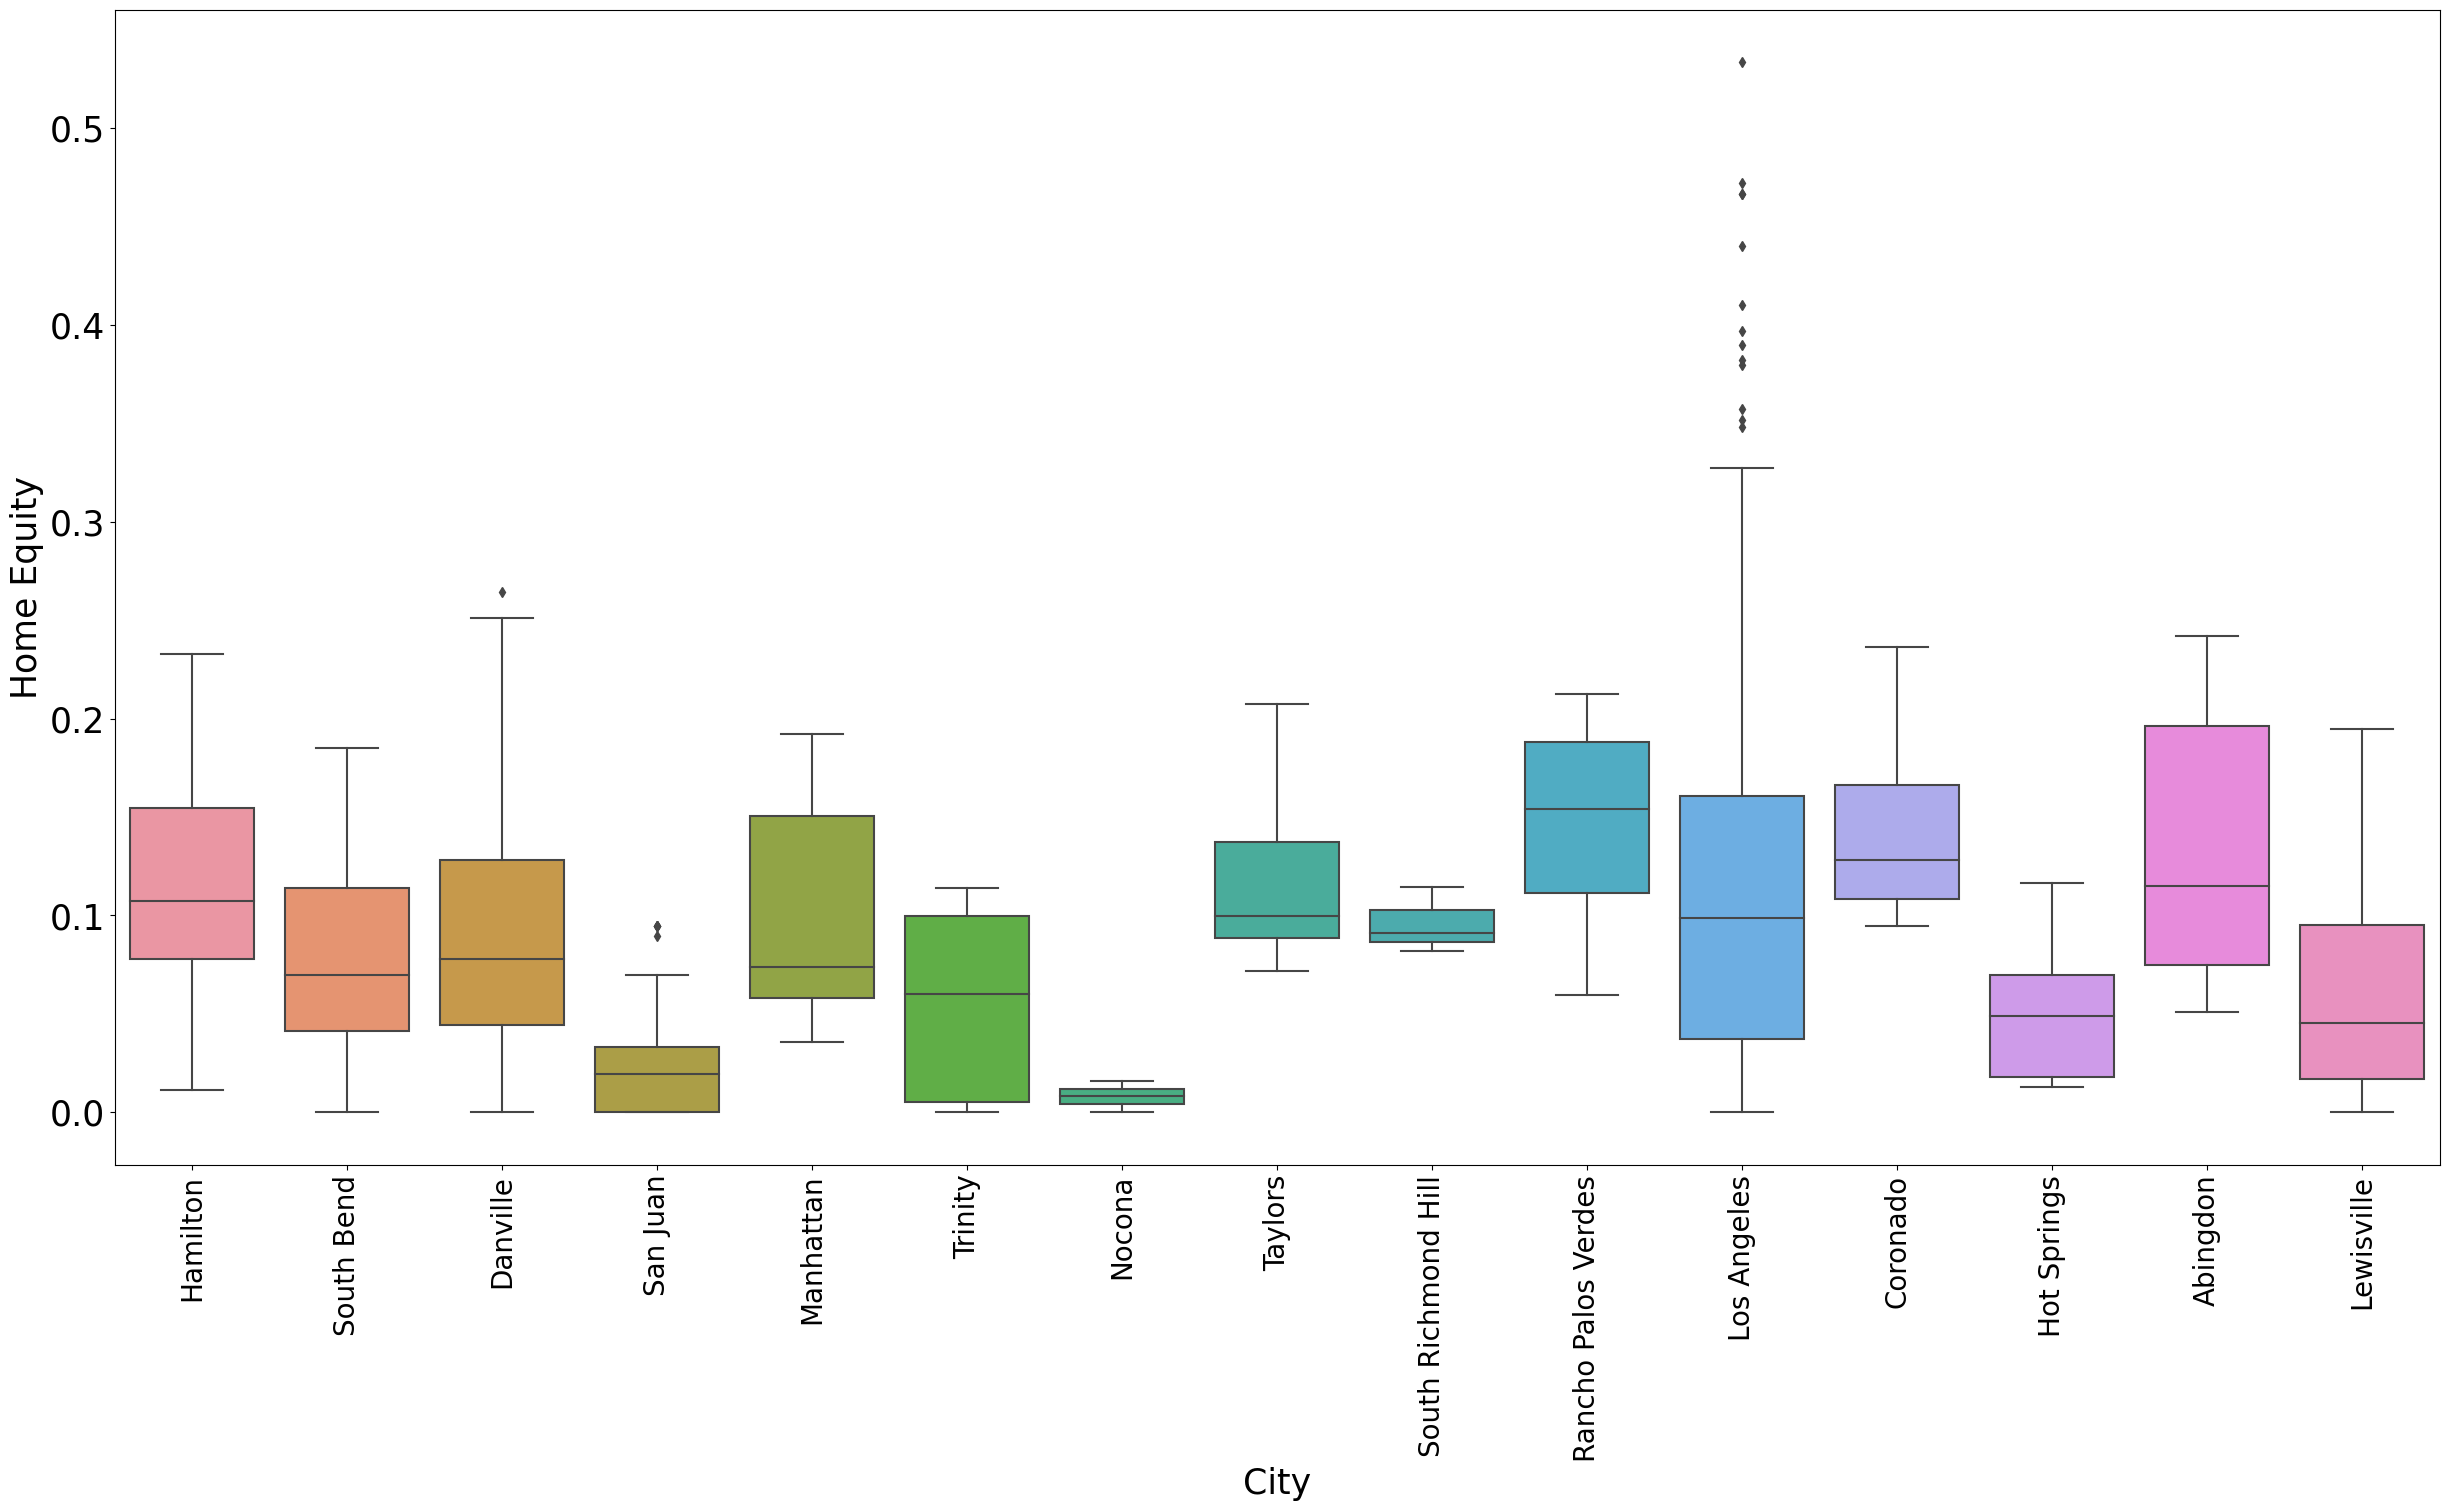

In [37]:
#Distribution for home equity
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['home_equity'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Home Equity', fontsize = 25)

In [38]:
#Distribution for Good debt
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['debt'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Good Debt', fontsize = 25)

Text(0, 0.5, 'Good Debt')

In [39]:
#Distribution for bad debt
plt.figure(figsize = (30, 15))
sns.boxplot(x = df['city'], y = df['bad_debt'])
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel('City', fontsize = 25)
plt.ylabel('Bad Debt', fontsize = 25)

Text(0, 0.5, 'Bad Debt')

## Create a collated income distribution chart for family income, house hold income, and remaining income

In [40]:
f,axs = plt.subplots(1, 3, figsize = (20, 10))
sns.histplot(combined_df['hi_mean'], color='green', ax=axs[0])
sns.histplot(combined_df['family_mean'], color='yellow', ax=axs[1])
sns.histplot(combined_df['rent_mean'], color='red', ax=axs[2])


<AxesSubplot:xlabel='rent_mean', ylabel='Count'>

## Use pop and ALand variables to create a new field called population density

In [41]:
combined_df['population_density'] = combined_df['pop'] / combined_df['ALand']
combined_df[['population_density']].head()

population_density
0            0.000026
1            0.001687
2            0.000099
3            0.002442
4            0.002207

## Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [42]:
combined_df['median_age'] = (((combined_df['male_age_median']*combined_df['male_pop'])+
                              (combined_df['female_age_median']*combined_df['female_pop']))/
                             (combined_df['male_pop']+combined_df['female_pop']))
combined_df[['median_age']].head()

median_age
0   44.667430
1   34.722748
2   41.774472
3   49.879012
4   21.965629

## Visualize the findings using appropriate chart type

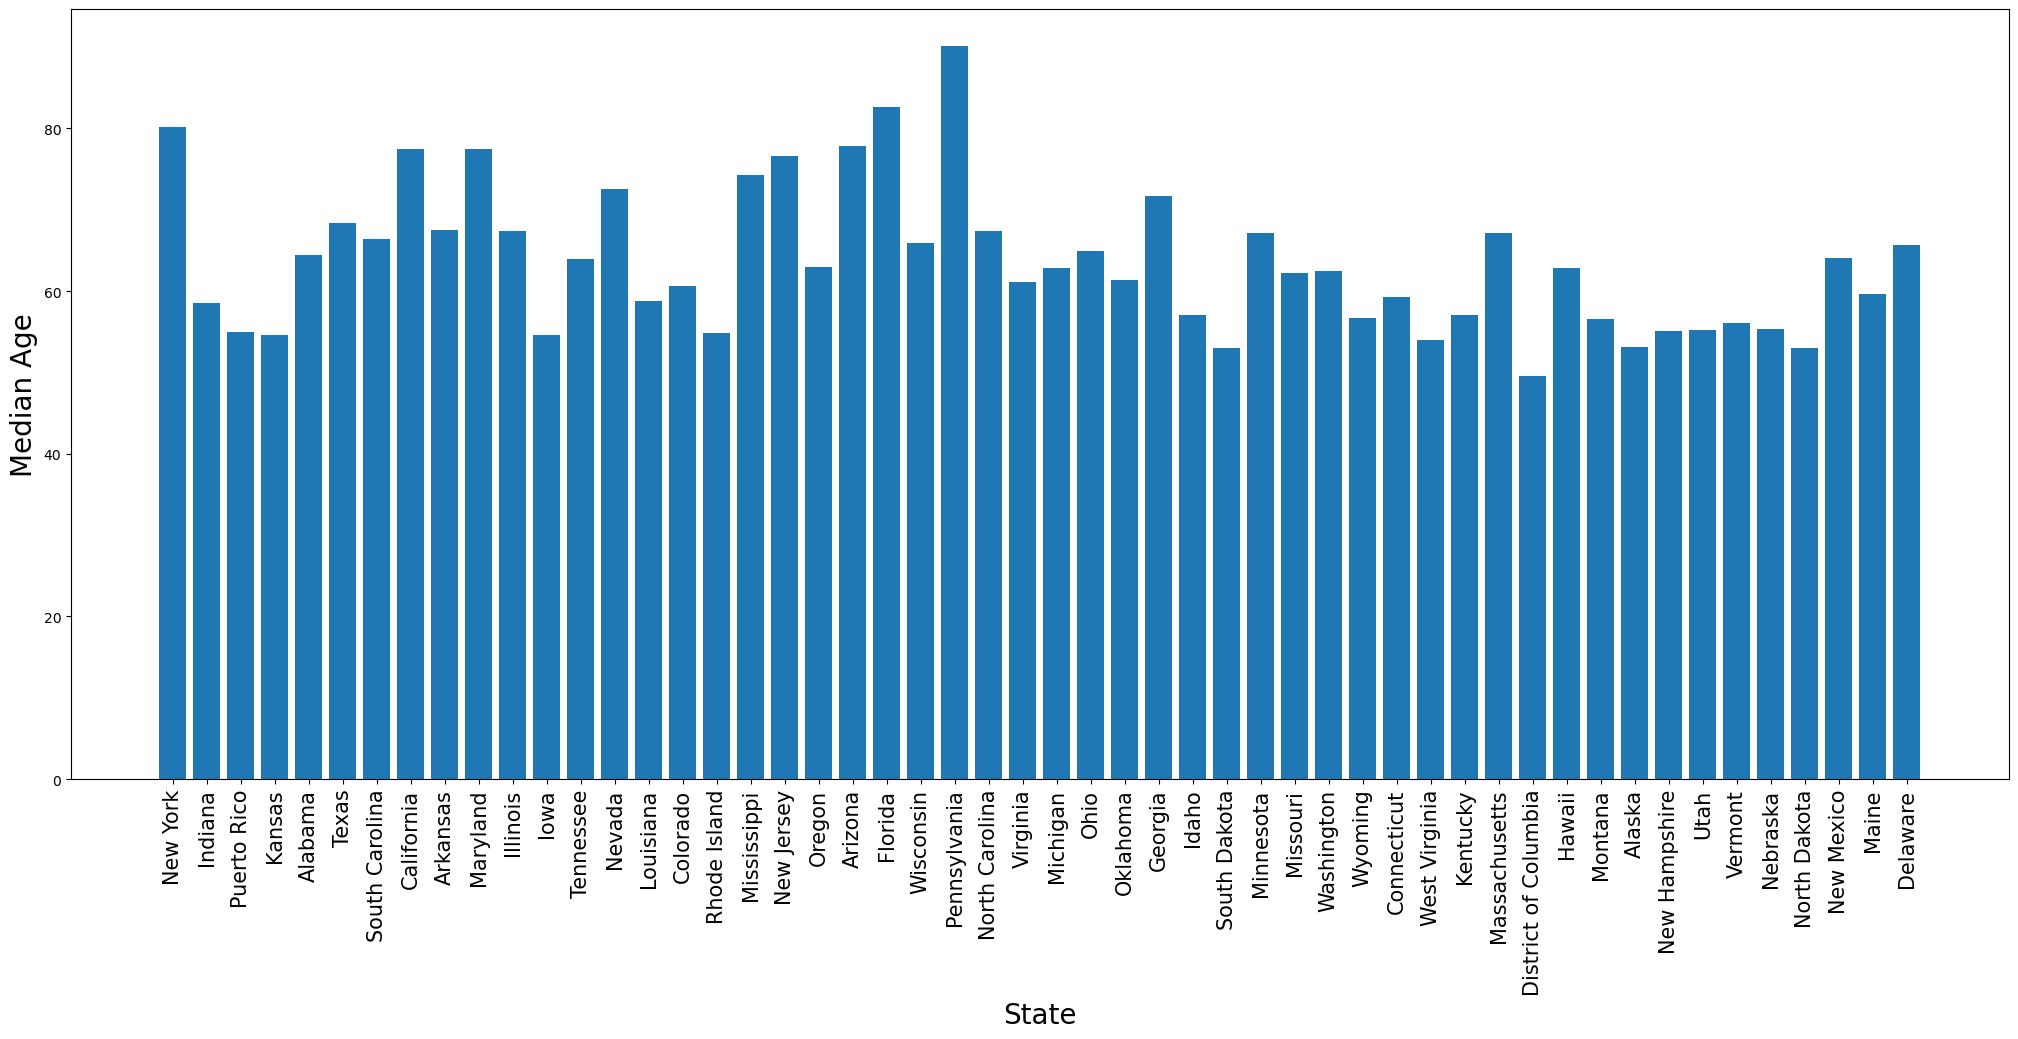

In [43]:
plt.figure(figsize = (25, 10))
plt.bar('state', 'median_age', data=combined_df)
plt.xlabel('State', fontsize=20)
plt.ylabel('Median Age', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()

## Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis

In [44]:
#Creating bins for :
# 0-5000 in class 1
# 5000-10000 in class 2
# 10000-15000 in class 3
# 15000-25000 in class 4 
# 25000-55000 in class 5

combined_df['pop_class'] = pd.cut(x = combined_df['pop'], 
                                  bins = [0,5000,10000,15000,25000,55000], 
                                  labels = ['1', '2', '3','4','5'])

In [45]:
combined_df['pop_class'].value_counts()

1    26173
2    11919
3      439
4       82
5        9
Name: pop_class, dtype: int64

## Analyze the married, separated, and divorced population for these population brackets

In [46]:
combined_df = combined_df.drop(combined_df[combined_df['pop']==0].index).reset_index(drop=True)

In [47]:
combined_df['pop_class']= combined_df['pop_class'].astype('int64')

In [48]:
for i in [1,2,3,4,5]:
        for j in ['married','separated','divorced']:
            print('Population Class:',i,'|',
                  'Mean:%.3f'%combined_df[combined_df['pop_class']==i][j].mean(),'|',
                  'Status:',j)

Population Class: 1 | Mean:0.496 | Status: married
Population Class: 1 | Mean:0.020 | Status: separated
Population Class: 1 | Mean:0.104 | Status: divorced
Population Class: 2 | Mean:0.531 | Status: married
Population Class: 2 | Mean:0.017 | Status: separated
Population Class: 2 | Mean:0.092 | Status: divorced
Population Class: 3 | Mean:0.575 | Status: married
Population Class: 3 | Mean:0.016 | Status: separated
Population Class: 3 | Mean:0.081 | Status: divorced
Population Class: 4 | Mean:0.606 | Status: married
Population Class: 4 | Mean:0.011 | Status: separated
Population Class: 4 | Mean:0.064 | Status: divorced
Population Class: 5 | Mean:0.588 | Status: married
Population Class: 5 | Mean:0.013 | Status: separated
Population Class: 5 | Mean:0.060 | Status: divorced


## Visualize using appropriate chart type

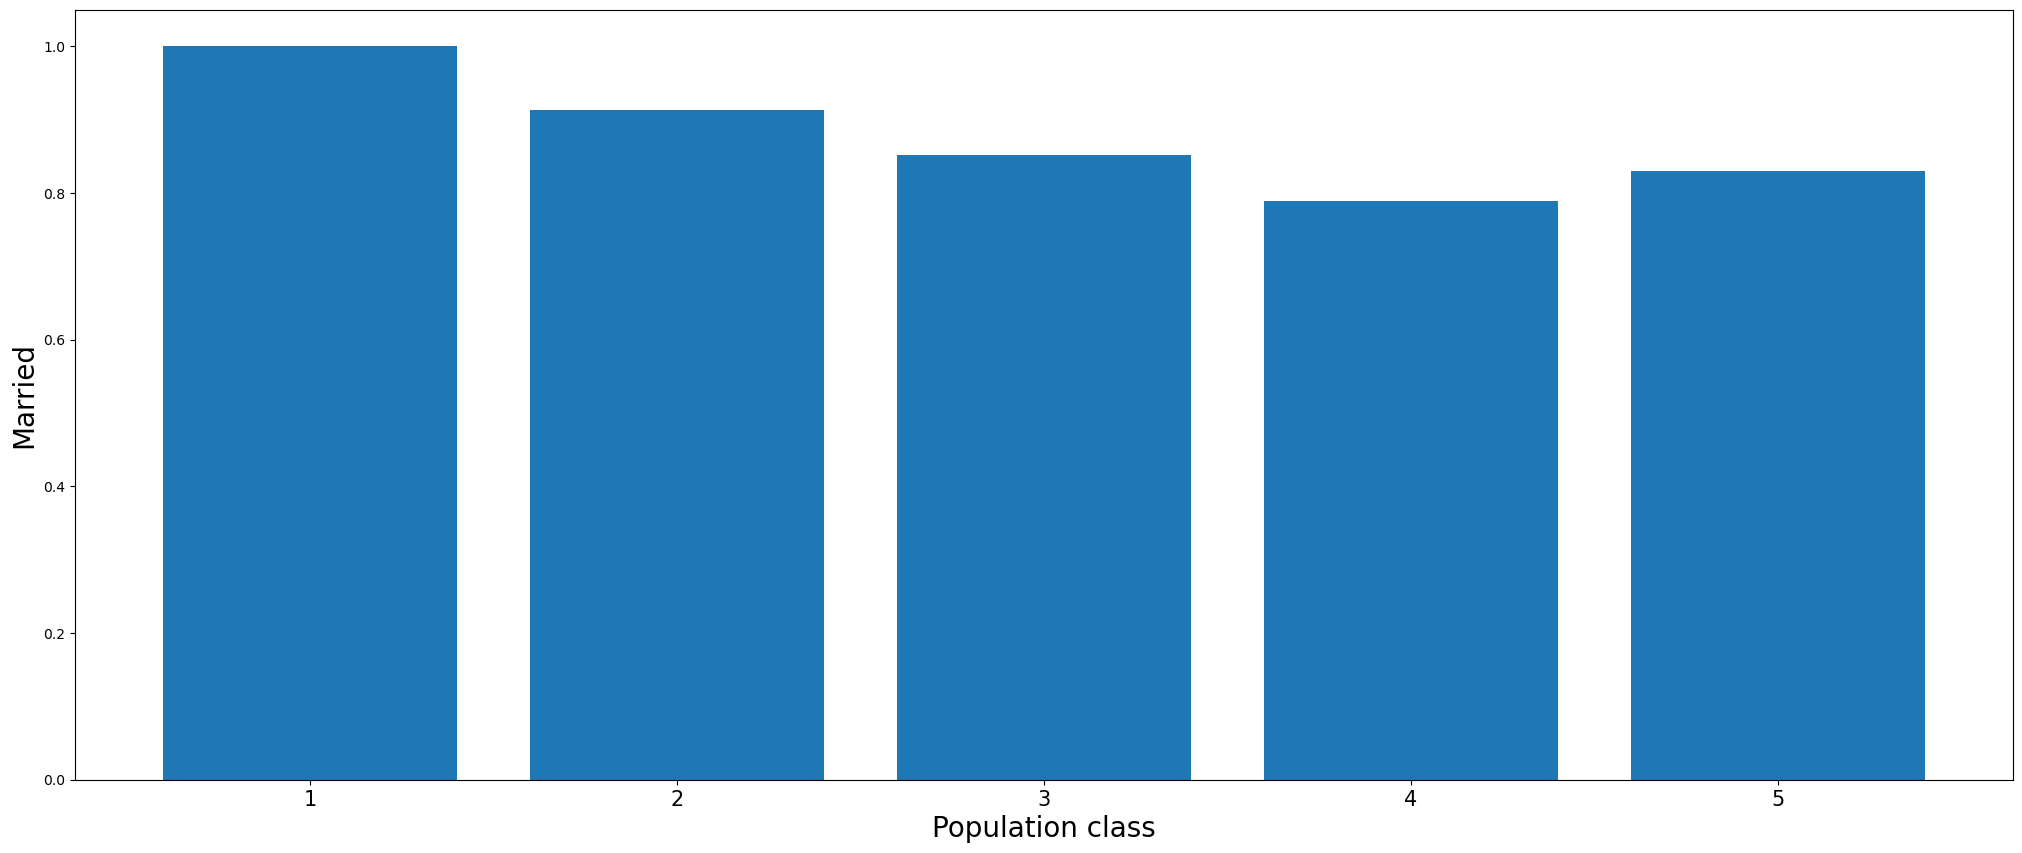

In [49]:
plt.figure(figsize = (25, 10))
plt.bar('pop_class', 'married', data=combined_df)
plt.xlabel('Population class', fontsize=20)
plt.ylabel('Married', fontsize=20)
plt.xticks(fontsize=15)
plt.show()


In [50]:
plt.figure(figsize = (25, 10))
plt.bar('pop_class', 'separated', data=combined_df)
plt.xlabel('Population class', fontsize=20)
plt.ylabel('Separated', fontsize=20)
plt.xticks(fontsize=15)
plt.show()


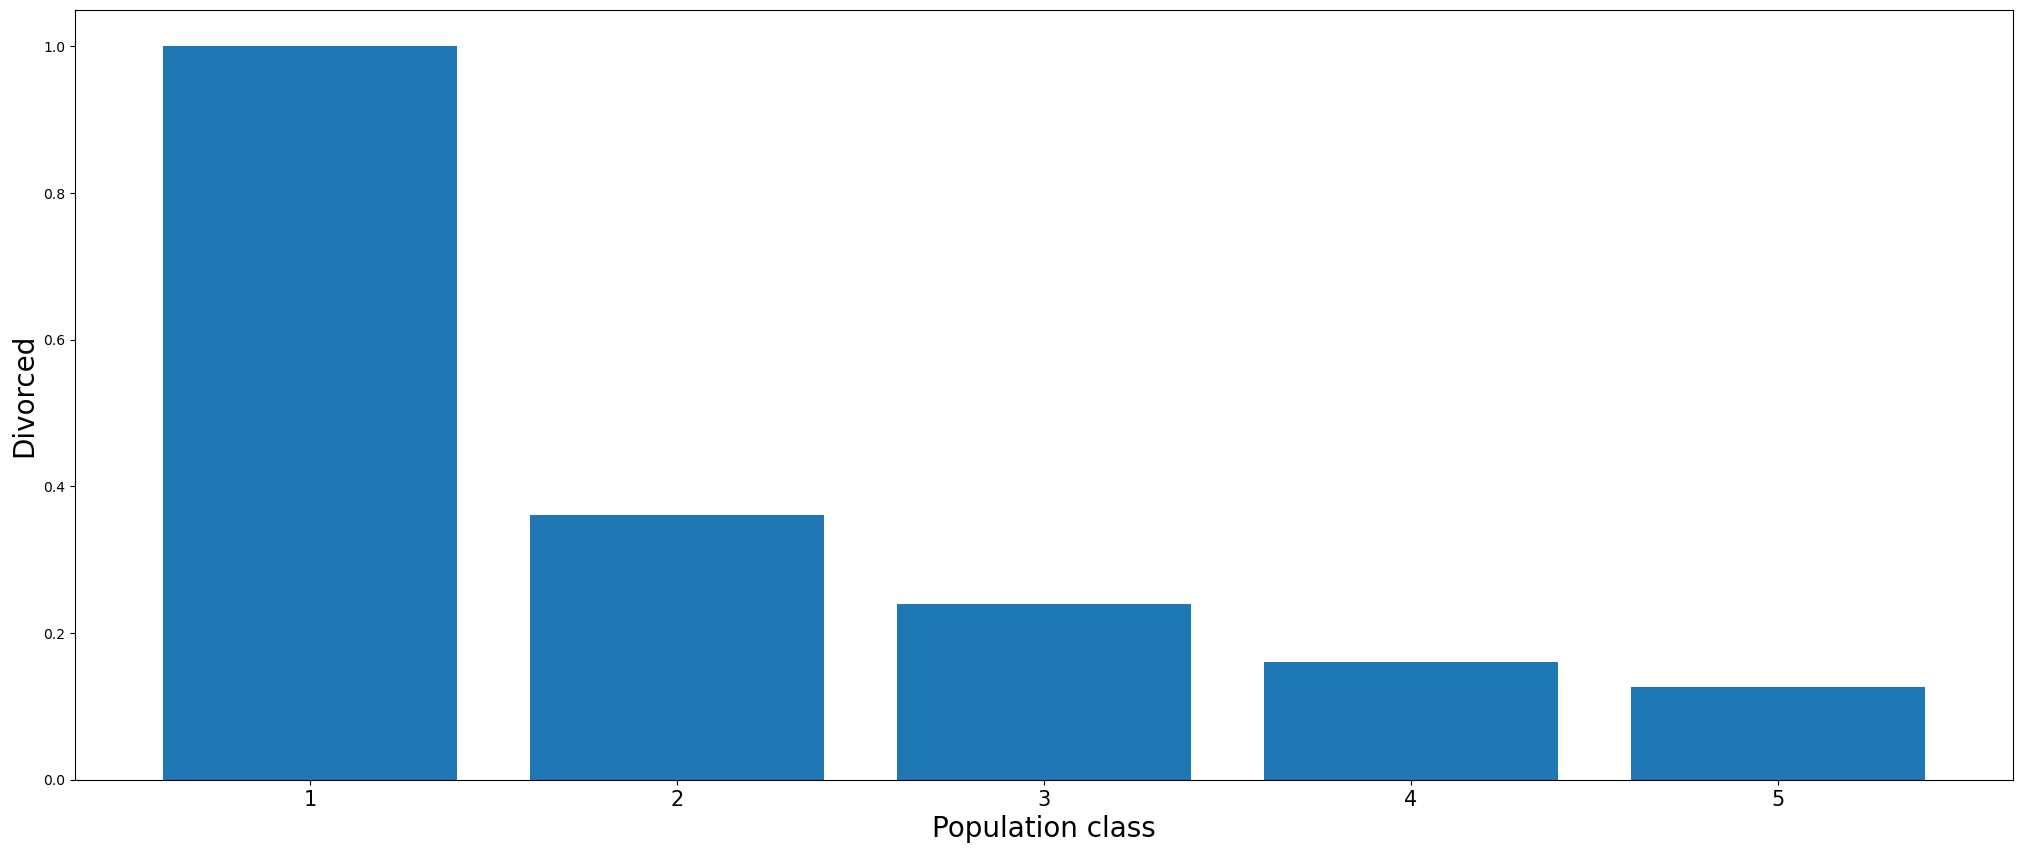

In [51]:
plt.figure(figsize = (25, 10))
plt.bar('pop_class', 'divorced', data=combined_df)
plt.xlabel('Population class', fontsize=20)
plt.ylabel('Divorced', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

## Please detail your observations for rent as a percentage of income at an overall level, and for different states

In [52]:
combined_df['%_rent'] = (combined_df['rent_mean']/combined_df['hi_mean'])*100
combined_df[['%_rent']].head()

%_rent
0  1.218824
1  1.919490
2  0.874441
3  1.648594
4  2.948295

In [53]:
states = combined_df['state'].unique().tolist()
states

['New York',
 'Indiana',
 'Puerto Rico',
 'Kansas',
 'Alabama',
 'Texas',
 'South Carolina',
 'California',
 'Arkansas',
 'Maryland',
 'Illinois',
 'Iowa',
 'Tennessee',
 'Nevada',
 'Louisiana',
 'Colorado',
 'Rhode Island',
 'Mississippi',
 'New Jersey',
 'Oregon',
 'Arizona',
 'Florida',
 'Wisconsin',
 'Pennsylvania',
 'North Carolina',
 'Virginia',
 'Michigan',
 'Ohio',
 'Oklahoma',
 'Georgia',
 'Idaho',
 'South Dakota',
 'Minnesota',
 'Missouri',
 'Washington',
 'Wyoming',
 'Connecticut',
 'West Virginia',
 'Kentucky',
 'Massachusetts',
 'District of Columbia',
 'Hawaii',
 'Montana',
 'Alaska',
 'New Hampshire',
 'Utah',
 'Vermont',
 'Nebraska',
 'North Dakota',
 'New Mexico',
 'Maine',
 'Delaware']

In [54]:
for i in states:
            print(i,'=','%.3f'%combined_df[combined_df['state']==i]['%_rent'].mean(),'%')
            print("------------------------")

New York = 1.705 %
------------------------
Indiana = 1.469 %
------------------------
Puerto Rico = 1.958 %
------------------------
Kansas = 1.368 %
------------------------
Alabama = 1.468 %
------------------------
Texas = 1.526 %
------------------------
South Carolina = 1.532 %
------------------------
California = 1.897 %
------------------------
Arkansas = 1.384 %
------------------------
Maryland = 1.599 %
------------------------
Illinois = 1.542 %
------------------------
Iowa = 1.209 %
------------------------
Tennessee = 1.489 %
------------------------
Nevada = 1.764 %
------------------------
Louisiana = 1.555 %
------------------------
Colorado = 1.591 %
------------------------
Rhode Island = 1.474 %
------------------------
Mississippi = 1.527 %
------------------------
New Jersey = 1.644 %
------------------------
Oregon = 1.594 %
------------------------
Arizona = 1.725 %
------------------------
Florida = 1.919 %
------------------------
Wisconsin = 1.415 %
-------

## Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings

In [55]:
var = combined_df.iloc[:,12:77]
var.head()

ALand   AWater   pop  male_pop  female_pop  rent_mean  rent_median  \
0  202183361.0  1699120  5230      2612        2618  769.38638        784.0   
1    1560828.0   100363  2633      1349        1284  804.87924        848.0   
2   69561595.0   284193  6881      3643        3238  742.77365        703.0   
3    1105793.0        0  2700      1141        1559  803.42018        782.0   
4    2554403.0        0  5637      2586        3051  938.56493        881.0   

   rent_stdev  rent_sample_weight  rent_samples  ...  female_age_mean  \
0   232.63967           272.34441         362.0  ...         44.48629   
1   253.46747           312.58622         513.0  ...         36.48391   
2   323.39011           291.85520         378.0  ...         42.15810   
3   297.39258           259.30316         368.0  ...         47.77526   
4   392.44096          1005.42886        1704.0  ...         24.17693   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           45.33333          22.51276                 685.33845   
1           37.58333          23.43353                 267.23367   
2           42.83333          23.94119                 707.01963   
3           50.58333          24.32015                 362.20193   
4           21.58333          11.10484                1854.48652   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
1              1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
2              3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
3              1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
4              3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  

[5 rows x 65 columns]

In [56]:
var.corr()

ALand    AWater       pop  male_pop  female_pop  rent_mean  \
ALand        1.000000  0.455449 -0.032923 -0.021729   -0.042678  -0.071482   
AWater       0.455449  1.000000 -0.013074 -0.009509   -0.016076  -0.011709   
pop         -0.032923 -0.013074  1.000000  0.979398    0.979774   0.163460   
male_pop    -0.021729 -0.009509  0.979398  1.000000    0.919180   0.159282   
female_pop  -0.042678 -0.016076  0.979774  0.919180    1.000000   0.160958   
...               ...       ...       ...       ...         ...        ...   
pct_own      0.054511  0.010880  0.096191  0.095353    0.093112   0.135691   
married      0.032989  0.000963  0.174286  0.141549    0.199644   0.258671   
married_snp  0.009389  0.024880 -0.037980 -0.001637   -0.072450  -0.106860   
separated   -0.006100  0.005697 -0.083472 -0.075661   -0.087820  -0.191482   
divorced     0.024592  0.005445 -0.162148 -0.147472   -0.170101  -0.378392   

             rent_median  rent_stdev  rent_sample_weight  rent_samples  ...  \
ALand          -0.069624   -0.035939           -0.047300     -0.070233  ...   
AWater         -0.011278    0.001320           -0.017178     -0.020876  ...   
pop             0.157320    0.120056            0.249878      0.407624  ...   
male_pop        0.153800    0.110374            0.224996      0.382443  ...   
female_pop      0.154415    0.124771            0.264380      0.416011  ...   
...                  ...         ...                 ...           ...  ...   
pct_own         0.127671    0.048370           -0.614093     -0.686146  ...   
married         0.246623    0.133570           -0.440629     -0.392278  ...   
married_snp    -0.094693   -0.072198            0.210805      0.207142  ...   
separated      -0.177771   -0.138700            0.208032      0.142119  ...   
divorced       -0.362280   -0.273227            0.205967      0.045314  ...   

             female_age_mean  female_age_median  female_age_stdev  \
ALand               0.020844           0.034160          0.027613   
AWater             -0.005615          -0.002002         -0.007199   
pop                -0.187897          -0.156152         -0.025017   
male_pop           -0.191231          -0.154260         -0.061878   
female_pop         -0.176957          -0.151680          0.012525   
...                      ...                ...               ...   
pct_own             0.423128           0.518821          0.321477   
married             0.333186           0.433537          0.302593   
married_snp        -0.135930          -0.175918         -0.058917   
separated          -0.073477          -0.107805          0.010437   
divorced            0.186785           0.141380          0.174573   

             female_age_sample_weight  female_age_samples   pct_own   married  \
ALand                       -0.041931           -0.042914  0.054511  0.032989   
AWater                      -0.015911           -0.016145  0.010880  0.000963   
pop                          0.921085            0.979159  0.096191  0.174286   
male_pop                     0.864340            0.919515  0.095353  0.141549   
female_pop                   0.939882            0.998469  0.093112  0.199644   
...                               ...                 ...       ...       ...   
pct_own                      0.017934            0.093004  1.000000  0.684075   
married                      0.070615            0.196185  0.684075  1.000000   
married_snp                 -0.074850           -0.068190 -0.384695 -0.249586   
separated                   -0.090801           -0.087294 -0.286517 -0.223238   
divorced                    -0.196979           -0.168545 -0.095292 -0.270660   

             married_snp  separated  divorced  
ALand           0.009389  -0.006100  0.024592  
AWater          0.024880   0.005697  0.005445  
pop            -0.037980  -0.083472 -0.162148  
male_pop       -0.001637  -0.075661 -0.147472  
female_pop     -0.072450  -0.087820 -0.170101  
...                  ...        ...     

<AxesSubplot:>

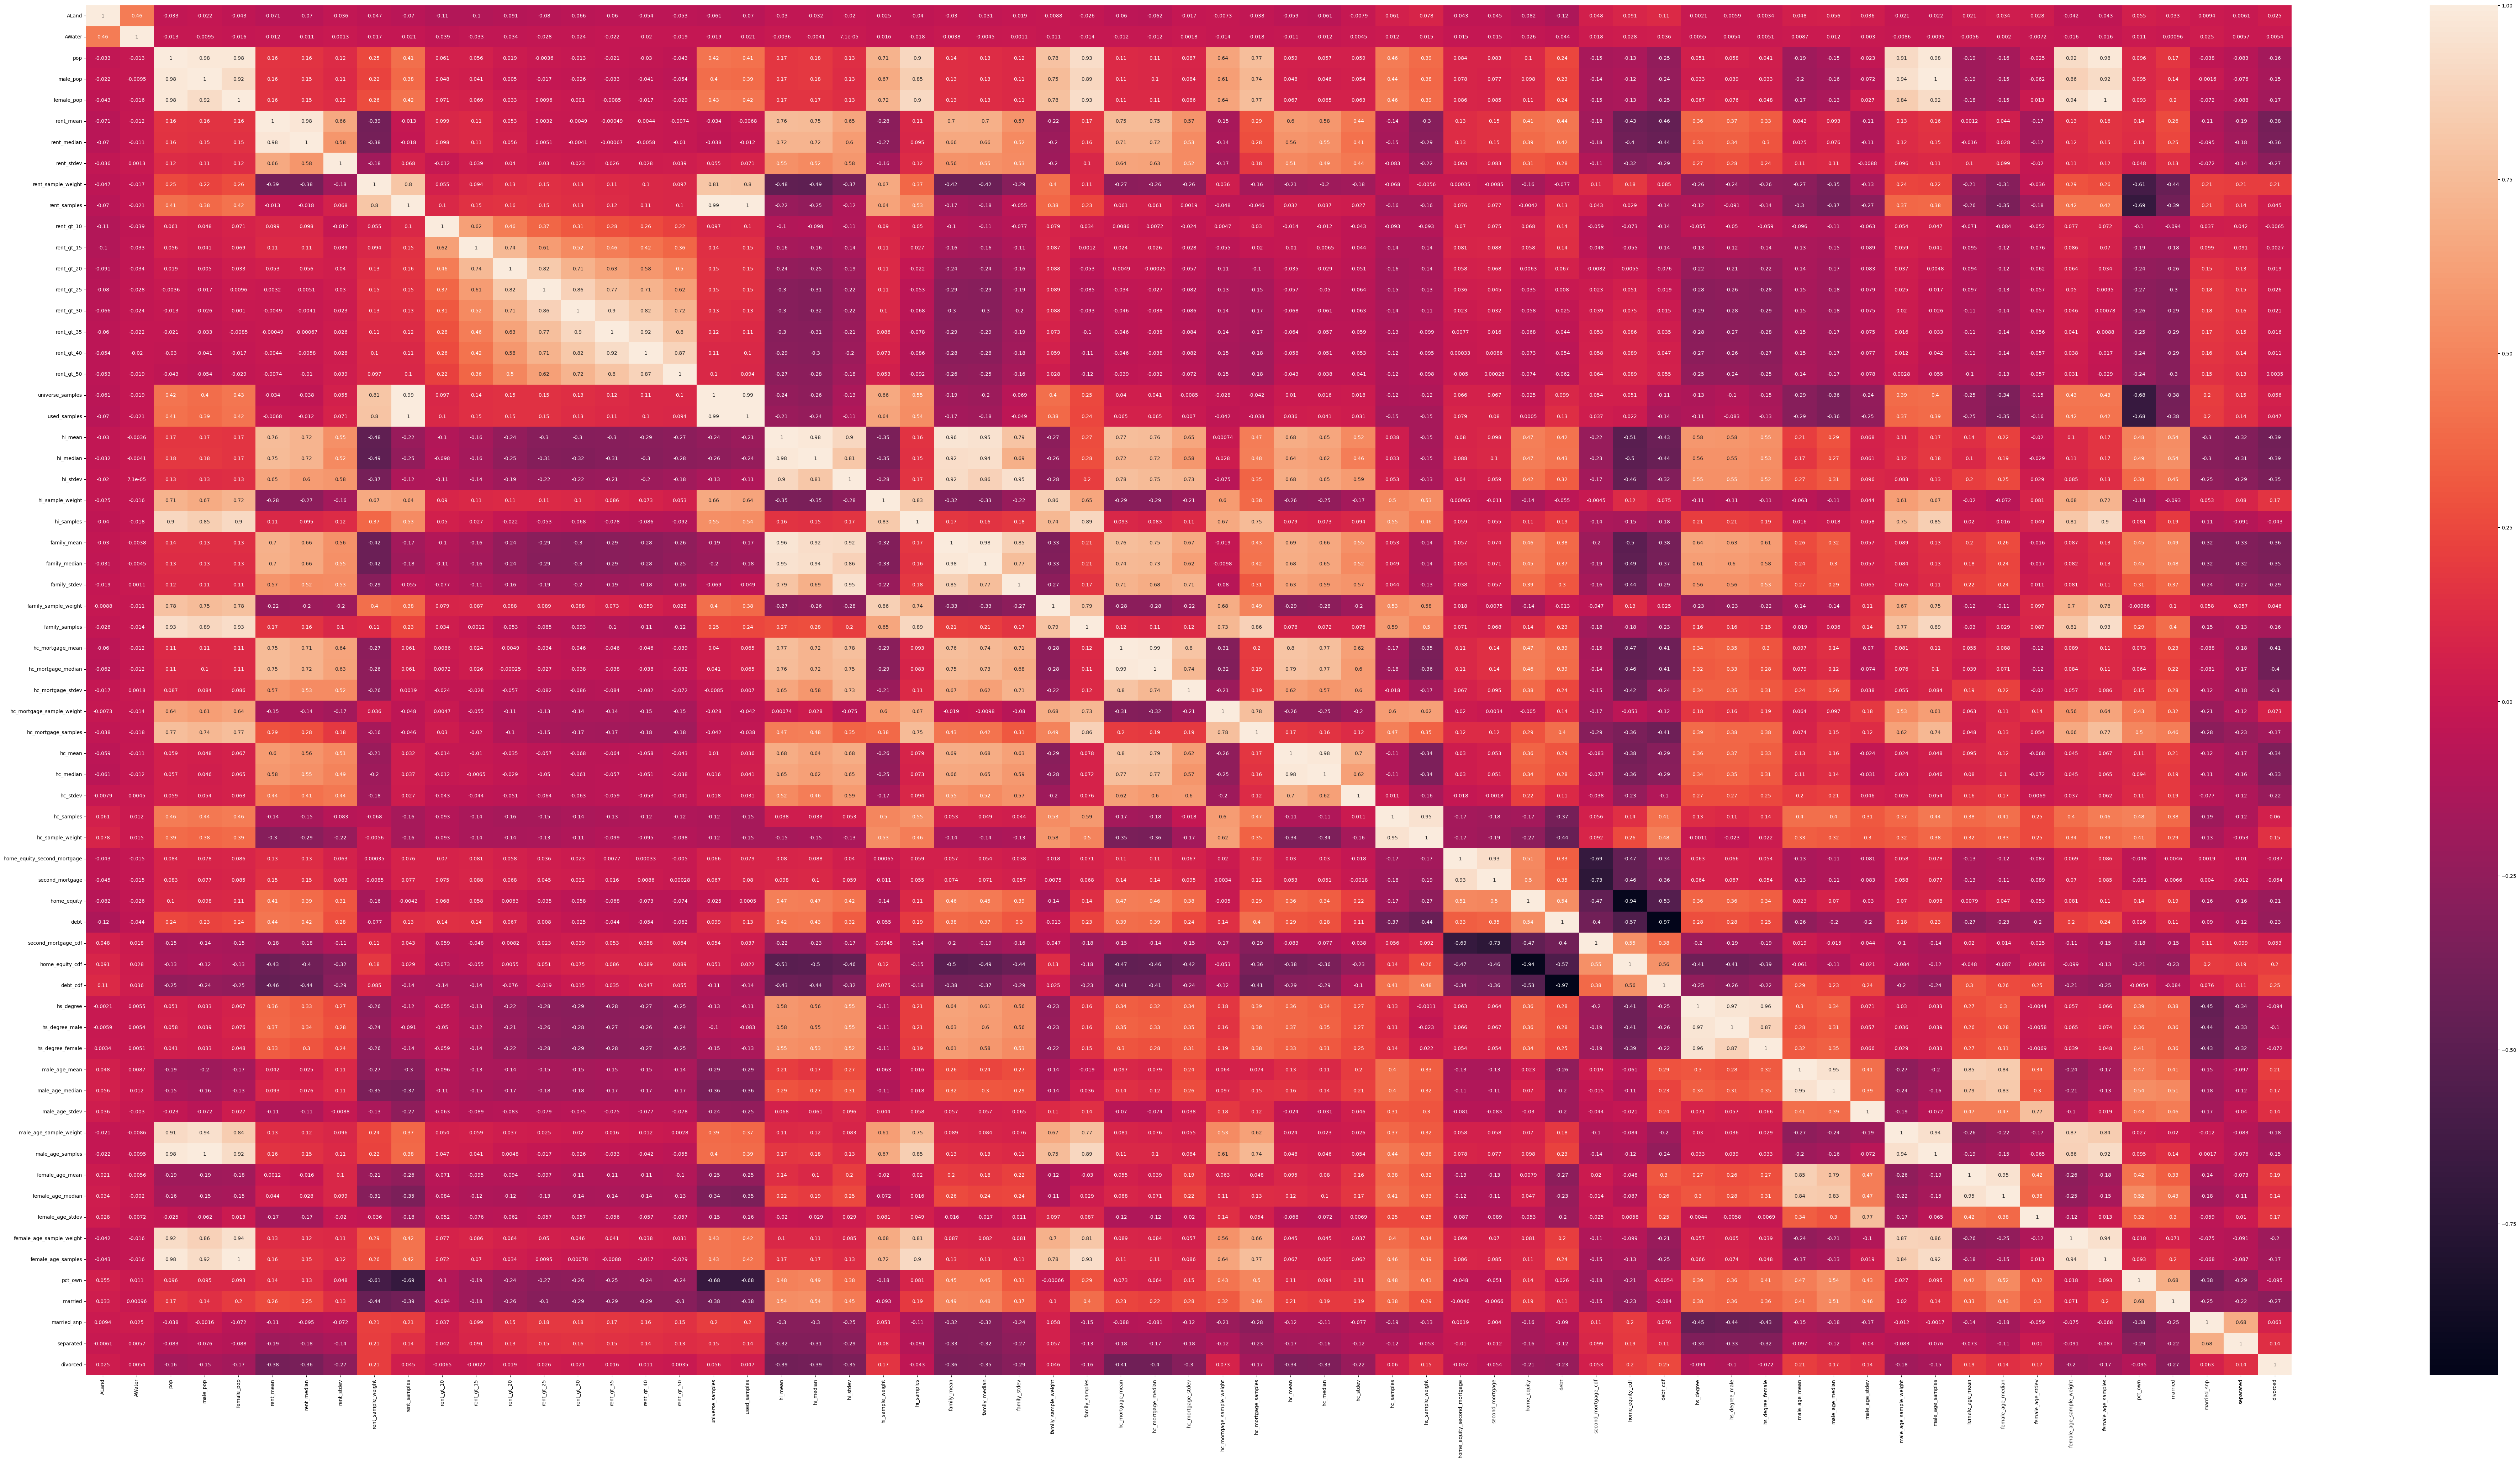

In [57]:
plt.figure(figsize = (100,50))
sns.heatmap(var.corr(),annot=True)

##  The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables

In [58]:
pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [59]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [60]:
fa = FactorAnalyzer()
fa.fit(var, 10)

FactorAnalyzer(rotation_kwargs={})

In [61]:
ev, v = fa.get_eigenvalues()

In [62]:
plt.figure(figsize = (10,5))
plt.plot(range(1, var.shape[1]+1), ev)
plt.xticks(np.arange(0, 70, step=5))
plt.xlabel('Number of factor')
plt.ylabel('Eigen value')
plt.show()

In [63]:
# Elbow bend can be observed at 8, thus taking n=8
n = 8
fa = FactorAnalyzer(n)
fa.fit(var, 10)
loads = fa.loadings_

print(loads)

[[-3.33372954e-03 -1.49337266e-02 -4.35546140e-02 -4.18560809e-02
  -1.53763218e-02  4.75300955e-03  1.36201429e-02 -1.82857127e-01]
 [-1.89265860e-03  1.66228269e-02 -8.85199904e-03 -1.25827565e-02
  -3.42481104e-02  9.46073958e-03  1.96987414e-02 -1.16703953e-01]
 [ 9.88776300e-01  1.27974731e-01 -1.26830840e-03  1.03770950e-01
  -9.48633665e-02 -8.98557505e-02  6.54512025e-03  1.49651779e-02]
 [ 9.62452952e-01  1.31358319e-01 -1.51799154e-02  7.86534729e-02
  -1.30059159e-01 -1.03929597e-01  9.93021665e-03 -1.63611983e-02]
 [ 9.66058426e-01  1.16802093e-01  1.27411071e-02  1.26718879e-01
  -5.43058805e-02 -6.75111476e-02  3.02359252e-03  4.71512336e-02]
 [ 6.50140660e-02  7.79322827e-01  1.08530610e-01 -1.09592889e-01
  -7.62487399e-02 -2.95044328e-02 -3.20944886e-02  1.48493373e-01]
 [ 6.59051212e-02  7.32441873e-01  9.77722106e-02 -1.25280537e-01
  -8.77109154e-02 -4.54522410e-02 -3.17312694e-02  1.53613113e-01]
 [ 3.25993625e-02  7.23847931e-01  1.07796565e-01  8.00402647e-02
   

In [64]:
df = pd.DataFrame(loads)
df.set_index(var.columns, drop=True, inplace=True)
for i in range(n):
    s = 'Factor ' + str(i+1)
    df.rename(columns = {i : s}, inplace=True)
    
df

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  \
ALand       -0.003334 -0.014934 -0.043555 -0.041856 -0.015376  0.004753   
AWater      -0.001893  0.016623 -0.008852 -0.012583 -0.034248  0.009461   
pop          0.988776  0.127975 -0.001268  0.103771 -0.094863 -0.089856   
male_pop     0.962453  0.131358 -0.015180  0.078653 -0.130059 -0.103930   
female_pop   0.966058  0.116802  0.012741  0.126719 -0.054306 -0.067511   
...               ...       ...       ...       ...       ...       ...   
pct_own      0.197456 -0.020997 -0.015031 -0.678463  0.307269  0.128219   
married      0.227745  0.195230 -0.171909 -0.387087  0.367672 -0.038298   
married_snp -0.021685  0.102122 -0.035274  0.121651  0.043369 -0.573046   
separated   -0.054215 -0.047630 -0.020866  0.113554  0.101690 -0.409493   
divorced    -0.160596 -0.435351 -0.022129  0.213631  0.275849  0.119023   

             Factor 7  Factor 8  
ALand        0.013620 -0.182857  
AWater       0.019699 -0.116704  
pop          0.006545  0.014965  
male_pop     0.009930 -0.016361  
female_pop   0.003024  0.047151  
...               ...       ...  
pct_own     -0.001792  0.007227  
married     -0.016757  0.108060  
married_snp  0.015262  0.046859  
separated    0.013951  0.073061  
divorced     0.037174  0.042841  

[65 rows x 8 columns]

## Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data

• Highschool graduation rates

• Median population age

• Second mortgage statistics

• Percent own

• Bad debt expense

In [65]:
latent_variables = combined_df[['pct_own','median_age','second_mortgage','bad_debt','hs_degree']]
latent_variables.head()

pct_own  median_age  second_mortgage  bad_debt  hs_degree
0  0.79046   44.667430          0.02077   0.09408    0.89288
1  0.52483   34.722748          0.02222   0.04274    0.90487
2  0.85331   41.774472          0.00000   0.09512    0.94288
3  0.65037   49.879012          0.01086   0.01086    0.91500
4  0.13046   21.965629          0.05426   0.05426    1.00000

In [66]:
latent_variables.corr()

pct_own  median_age  second_mortgage  bad_debt  hs_degree
pct_own          1.000000    0.548747        -0.050761  0.133315   0.394067
median_age       0.548747    1.000000        -0.116364  0.056075   0.334217
second_mortgage -0.050761   -0.116364         1.000000  0.559154   0.063609
bad_debt         0.133315    0.056075         0.559154  1.000000   0.350089
hs_degree        0.394067    0.334217         0.063609  0.350089   1.000000

## Data Modeling

In [67]:
combined_df.head()

UID  COUNTYID  STATEID        state state_ab        city  \
0  267822        53       36     New York       NY    Hamilton   
1  246444       141       18      Indiana       IN  South Bend   
2  245683        63       18      Indiana       IN    Danville   
3  279653       127       72  Puerto Rico       PR    San Juan   
4  247218       161       20       Kansas       KS   Manhattan   

            place   type  zip_code  area_code  ...  married  married_snp  \
0        Hamilton   City     13346        315  ...  0.57851      0.01882   
1        Roseland   City     46616        574  ...  0.34886      0.01426   
2        Danville   City     46122        317  ...  0.64745      0.02830   
3        Guaynabo  Urban       927        787  ...  0.47257      0.02021   
4  Manhattan City   City     66502        785  ...  0.12356      0.00000   

   separated  divorced  data_type  bad_debt  population_density  median_age  \
0    0.01240   0.08770      Train   0.09408            0.000026   44.667430   
1    0.01426   0.09030      Train   0.04274            0.001687   34.722748   
2    0.01607   0.10657      Train   0.09512            0.000099   41.774472   
3    0.02021   0.10106      Train   0.01086            0.002442   49.879012   
4    0.00000   0.03109      Train   0.05426            0.002207   21.965629   

   pop_class    %_rent  
0          2  1.218824  
1          1  1.919490  
2          2  0.874441  
3          1  1.648594  
4          2  2.948295  

[5 rows x 83 columns]

In [68]:
model1 = combined_df.drop(columns=['UID','COUNTYID','STATEID','state_ab','zip_code','area_code','lat','lng','type'])

In [69]:
# Since we have few features that are categorical, will convert them into integer using label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
model1['state']=le.fit_transform(model1['state'])

le1 = LabelEncoder()
model1['city']=le.fit_transform(model1['city'])

le2 = LabelEncoder()
model1['place']=le2.fit_transform(model1['place']) 

le3 = LabelEncoder()
model1['data_type']=le3.fit_transform(model1['data_type'])
                                  

In [70]:
model1_train = model1[model1['data_type']==1]
model1_test = model1[model1['data_type']==0]

In [71]:
model1_x_train = model1_train.drop(columns=['hc_mortgage_mean']).values
model1_x_train

array([[3.20000000e+01, 2.95200000e+03, 4.32000000e+03, ...,
        4.46674298e+01, 2.00000000e+00, 1.21882442e+00],
       [1.40000000e+01, 6.79700000e+03, 9.07100000e+03, ...,
        3.47227481e+01, 1.00000000e+00, 1.91949027e+00],
       [1.40000000e+01, 1.70800000e+03, 2.47000000e+03, ...,
        4.17744723e+01, 2.00000000e+00, 8.74441002e-01],
       ...,
       [5.00000000e+00, 7.74200000e+03, 9.17800000e+03, ...,
        4.40893115e+01, 1.00000000e+00, 1.06319740e+00],
       [4.40000000e+01, 1.42500000e+03, 2.08800000e+03, ...,
        4.50292805e+01, 3.00000000e+00, 1.19174324e+00],
       [2.80000000e+01, 3.87500000e+03, 8.00500000e+03, ...,
        3.11323118e+01, 1.00000000e+00, 1.83906163e+00]])

In [72]:
model1_x_test = model1_test.drop(columns=['hc_mortgage_mean']).values
model1_x_test

array([[2.20000000e+01, 1.81600000e+03, 2.52000000e+03, ...,
        3.11890533e+01, 1.00000000e+00, 1.75578752e+00],
       [1.90000000e+01, 2.69000000e+02, 3.91000000e+02, ...,
        4.63829910e+01, 1.00000000e+00, 1.15114733e+00],
       [3.80000000e+01, 5.67800000e+03, 6.72600000e+03, ...,
        4.31474198e+01, 1.00000000e+00, 1.39485508e+00],
       ...,
       [2.10000000e+01, 3.89700000e+03, 6.64000000e+03, ...,
        3.93236302e+01, 2.00000000e+00, 1.19454582e+00],
       [1.50000000e+01, 1.05000000e+03, 1.57000000e+03, ...,
        4.45285973e+01, 2.00000000e+00, 1.20415796e+00],
       [4.40000000e+01, 2.77000000e+02, 1.03090000e+04, ...,
        3.52071711e+01, 1.00000000e+00, 1.63791229e+00]])

In [73]:
model1_x_train.shape, model1_x_test.shape

((27019, 73), (11603, 73))

In [74]:
model1_y_train = model1_train['hc_mortgage_mean'].values
model1_y_train

array([1414.80295,  864.4139 , 1506.06758, ..., 1671.07908, 3074.83088,
       1455.4234 ])

In [75]:
model1_y_test = model1_test['hc_mortgage_mean'].values
model1_y_test

array([1139.24548, 1533.25988, 1254.54462, ..., 1791.63902, 1182.30365,
       1364.17379])

## Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### First model with all the features

In [77]:
model1_lr = LinearRegression()

In [78]:
model1_lr.fit(model1_x_train,model1_y_train)

LinearRegression()

In [79]:
model1_y_pred = model1_lr.predict(model1_x_test)

In [80]:
r2_score(model1_y_test, model1_y_pred)

0.9874477647134917

R square score for model1 is 0.987 i.e very high but R square value increases with the increased number of features and thus we will reduce number of features for model2

In [81]:
import math

In [82]:
RMSE =  math.sqrt(mean_squared_error(model1_y_test, model1_y_pred))
RMSE

70.59062563607944

Root Mean Square Error for model1 is 70.59

In [83]:
combined_df.corr()

UID  COUNTYID   STATEID  zip_code  area_code  \
UID                 1.000000  0.262508  0.977250 -0.224913   0.020760   
COUNTYID            0.262508  1.000000  0.224545  0.034504   0.064198   
STATEID             0.977250  0.224545  1.000000 -0.263080   0.041162   
zip_code           -0.224913  0.034504 -0.263080  1.000000  -0.006866   
area_code           0.020760  0.064198  0.041162 -0.006866   1.000000   
...                      ...       ...       ...       ...        ...   
bad_debt           -0.129954 -0.125309 -0.150047 -0.061916   0.001796   
population_density -0.014908 -0.080217 -0.011986 -0.118788  -0.028577   
median_age         -0.018141 -0.060917 -0.014016 -0.130128  -0.013401   
pop_class          -0.016743  0.003548 -0.022874  0.062080   0.030310   
%_rent             -0.144161 -0.015744 -0.129989  0.043692   0.018369   

                         lat       lng     ALand    AWater       pop  ...  \
UID                 0.177594  0.289902 -0.015847 -0.028310 -0.023254  ...   
COUNTYID           -0.150504  0.071227  0.011864  0.012463  0.001943  ...   
STATEID             0.106460  0.320501 -0.015467 -0.026276 -0.030100  ...   
zip_code           -0.064274 -0.927673  0.072676  0.031016  0.075278  ...   
area_code          -0.123012 -0.012082  0.015327  0.021423  0.031721  ...   
...                      ...       ...       ...       ...       ...  ...   
bad_debt            0.213900 -0.012860 -0.082722 -0.025402  0.104485  ...   
population_density  0.052490  0.066848 -0.047295 -0.013258  0.021919  ...   
median_age          0.013277  0.109913  0.046250  0.005540 -0.160976  ...   
pop_class          -0.074146 -0.070071 -0.020830 -0.007683  0.835341  ...   
%_rent             -0.179452 -0.077973 -0.062773 -0.013437 -0.053773  ...   

                     pct_own   married  married_snp  separated  divorced  \
UID                 0.071212  0.041156    -0.038161   0.017284  0.011448   
COUNTYID           -0.001569 -0.016390     0.036329   0.063948  0.048694   
STATEID             0.069107  0.025293    -0.032665   0.028862  0.017456   
zip_code           -0.068956  0.029880     0.016550  -0.052363  0.045846   
area_code           0.019473  0.057753     0.027414   0.021805 -0.041883   
...                      ...       ...          ...        ...       ...   
bad_debt            0.133315  0.184086    -0.154260  -0.155391 -0.212103   
population_density -0.421383 -0.245627     0.211178   0.091787 -0.156759   
median_age          0.548747  0.493660    -0.189283  -0.118196  0.161701   
pop_class           0.072394  0.132010    -0.021359  -0.063000 -0.133362   
%_rent             -0.537782 -0.463612     0.259538   0.201962  0.001847   

                    bad_debt  population_density  median_age  pop_class  \
UID                -0.129954           -0.014908   -0.018141  -0.016743   
COUNTYID           -0.125309           -0.080217   -0.060917   0.003548   
STATEID            -0.150047           -0.011986   -0.014016  -0.022874   
zip_code           -0.061916           -0.118788   -0.130128   0.062080   
area_code           0.001796           -0.028577   -0.013401   0.030310   
...                      ...                 ...         ...        ...   
bad_debt            1.000000           -0.008386    0.056075   0.080114   
population_density -0.008386            1.000000   -0.193997   0.010541   
median_age          0.056075           -0.193997    1.000000  -0.134283   
pop_class           0.080114            0.010541   -0.134283   1.000000   
%_rent             -0.106819            0.274902   -0.316680  -0.032398   

                      %_rent  
UID                -0.144161  
COUNTYID           -0.015744  
STATEID            -0.129989  
zip_code            0.043692  
area_code           0.018369  
...                      ...  
bad_debt           -0.106819  
population_density  0.274902  
median_age         -0.316680  
pop_class          -0.032398  
%_rent              1.000000  

[77 rows x 77 columns]

### Second Model with fewer features (Removing features which were insignificant based on correlation values)

In [84]:
model2 = model1[['state','city','place','ALand','pop','rent_mean','rent_stdev','hi_mean',
                      'hi_sample_weight','hc_stdev','second_mortgage',
                      'debt','debt_cdf','hs_degree','median_age','pct_own','median_age',
                       'home_equity','data_type','hc_mortgage_mean']]
model2.head()

state  city  place        ALand   pop  rent_mean  rent_stdev      hi_mean  \
0     32  2952   4320  202183361.0  5230  769.38638   232.63967  63125.28406   
1     14  6797   9071    1560828.0  2633  804.87924   253.46747  41931.92593   
2     14  1708   2470   69561595.0  6881  742.77365   323.39011  84942.68317   
3     39  6402   4251    1105793.0  2700  803.42018   297.39258  48733.67116   
4     16  4255   6274    2554403.0  5637  938.56493   392.44096  31834.15466   

   hi_sample_weight   hc_stdev  second_mortgage     debt  debt_cdf  hs_degree  \
0        1290.96240  270.11299          0.02077  0.52963   0.73341    0.89288   
1         838.74664  125.40457          0.02222  0.60855   0.58120    0.90487   
2        1155.20980  184.42175          0.00000  0.73484   0.28704    0.94288   
3         928.32193  185.55887          0.01086  0.52714   0.73727    0.91500   
4        1548.67477   76.12674          0.05426  0.51938   0.74967    1.00000   

   median_age  pct_own  median_age  home_equity  data_type  hc_mortgage_mean  
0   44.667430  0.79046   44.667430      0.08919          1        1414.80295  
1   34.722748  0.52483   34.722748      0.04274          1         864.41390  
2   41.774472  0.85331   41.774472      0.09512          1        1506.06758  
3   49.879012  0.65037   49.879012      0.01086          1        1175.28642  
4   21.965629  0.13046   21.965629      0.05426          1        1192.58759

In [85]:
model2.corr()

state      city     place     ALand       pop  rent_mean  \
state             1.000000 -0.028575 -0.000981 -0.012449 -0.024165  -0.186634   
city             -0.028575  1.000000  0.524523  0.000731  0.014808   0.023054   
place            -0.000981  0.524523  1.000000 -0.001237  0.010081   0.027506   
ALand            -0.012449  0.000731 -0.001237  1.000000 -0.032923  -0.071482   
pop              -0.024165  0.014808  0.010081 -0.032923  1.000000   0.163460   
rent_mean        -0.186634  0.023054  0.027506 -0.071482  0.163460   1.000000   
rent_stdev       -0.141012  0.023935  0.027797 -0.035939  0.120056   0.662229   
hi_mean          -0.050857  0.017941  0.014207 -0.030496  0.173600   0.755061   
hi_sample_weight  0.028375  0.005275  0.007095 -0.025387  0.710603  -0.277523   
hc_stdev         -0.035079 -0.003947  0.020390 -0.007894  0.059366   0.444302   
second_mortgage  -0.105186  0.009321  0.004195 -0.044954  0.082808   0.150986   
debt             -0.131503  0.010578  0.016683 -0.122598  0.241463   0.436349   
debt_cdf          0.136978 -0.009674 -0.016895  0.111788 -0.249127  -0.458502   
hs_degree         0.039840  0.018611 -0.004280 -0.002124  0.051071   0.362281   
median_age       -0.018062  0.028612  0.003759  0.046250 -0.160976   0.070182   
pct_own           0.066441  0.037039 -0.016203  0.054511  0.096191   0.135691   
median_age       -0.018062  0.028612  0.003759  0.046250 -0.160976   0.070182   
home_equity      -0.123769  0.030183  0.016898 -0.082397  0.104680   0.411801   
data_type        -0.004220 -0.000051 -0.008253  0.008880 -0.011458   0.001726   
hc_mortgage_mean -0.138523  0.001830  0.030580 -0.059813  0.113466   0.751835   

                  rent_stdev   hi_mean  hi_sample_weight  hc_stdev  \
state              -0.141012 -0.050857          0.028375 -0.035079   
city                0.023935  0.017941          0.005275 -0.003947   
place               0.027797  0.014207          0.007095  0.020390   
ALand              -0.035939 -0.030496         -0.025387 -0.007894   
pop                 0.120056  0.173600          0.710603  0.059366   
rent_mean           0.662229  0.755061         -0.277523  0.444302   
rent_stdev          1.000000  0.552092         -0.163111  0.439052   
hi_mean             0.552092  1.000000         -0.348184  0.519272   
hi_sample_weight   -0.163111 -0.348184          1.000000 -0.165525   
hc_stdev            0.439052  0.519272         -0.165525  1.000000   
second_mortgage     0.083304  0.098118         -0.011125 -0.001750   
debt                0.276172  0.419093         -0.054785  0.113643   
debt_cdf           -0.286795 -0.425671          0.074551 -0.101233   
hs_degree           0.269386  0.582384         -0.109175  0.271697   
median_age          0.112328  0.262784         -0.091455  0.199900   
pct_own             0.048370  0.481934         -0.176696  0.112529   
median_age          0.112328  0.262784         -0.091455  0.199900   
home_equity         0.308239  0.473898         -0.137782  0.215328   
data_type          -0.000182  0.004762         -0.011605  0.004401   
hc_mortgage_mean    0.638806  0.767424         -0.286314  0.618546   

                  second_mortgage      debt  debt_cdf  hs_degree  median_age  \
state                   -0.105186 -0.131503  0.136978   0.039840   -0.018062   
city                     0.009321  0.010578 -0.009674   0.018611    0.028612   
place                    0.004195  0.016683 -0.016895  -0.004280    0.003759   
ALand                   -0.044954 -0.122598  0.111788  -0.002124    0.046250   
pop                      0.082808  0.241463 -0.249127   0.051071   -0.160976   
rent_mean                0.150986  0.436349 -0.458502   0.362281    0.070182   
rent_stdev               0.083304  0.276172 -0.286795   0.269386    0.112328   
hi_mean                  0.098118  0.419093 -0.425671   0.582384    0.262784   
hi_sample_weight        -0.011125 -0.054785  0.074551  -0.109175   -0.091455   
hc_stdev                -0.001750  0.113643 -0.1

In [86]:
model2_train = model2[model2['data_type']==1]
model2_test = model2[model2['data_type']==0]

In [87]:
model2_x_train = model2_train.drop(columns=['hc_mortgage_mean']).values
model2_x_train

array([[3.20000000e+01, 2.95200000e+03, 4.32000000e+03, ...,
        4.46674298e+01, 8.91900000e-02, 1.00000000e+00],
       [1.40000000e+01, 6.79700000e+03, 9.07100000e+03, ...,
        3.47227481e+01, 4.27400000e-02, 1.00000000e+00],
       [1.40000000e+01, 1.70800000e+03, 2.47000000e+03, ...,
        4.17744723e+01, 9.51200000e-02, 1.00000000e+00],
       ...,
       [5.00000000e+00, 7.74200000e+03, 9.17800000e+03, ...,
        4.40893115e+01, 7.85700000e-02, 1.00000000e+00],
       [4.40000000e+01, 1.42500000e+03, 2.08800000e+03, ...,
        4.50292805e+01, 1.25560000e-01, 1.00000000e+00],
       [2.80000000e+01, 3.87500000e+03, 8.00500000e+03, ...,
        3.11323118e+01, 1.83620000e-01, 1.00000000e+00]])

In [88]:
model2_x_test = model2_test.drop(columns=['hc_mortgage_mean']).values
model2_x_test

array([[2.20000000e+01, 1.81600000e+03, 2.52000000e+03, ...,
        3.11890533e+01, 7.65100000e-02, 0.00000000e+00],
       [1.90000000e+01, 2.69000000e+02, 3.91000000e+02, ...,
        4.63829910e+01, 1.43750000e-01, 0.00000000e+00],
       [3.80000000e+01, 5.67800000e+03, 6.72600000e+03, ...,
        4.31474198e+01, 6.49700000e-02, 0.00000000e+00],
       ...,
       [2.10000000e+01, 3.89700000e+03, 6.64000000e+03, ...,
        3.93236302e+01, 1.35450000e-01, 0.00000000e+00],
       [1.50000000e+01, 1.05000000e+03, 1.57000000e+03, ...,
        4.45285973e+01, 7.96700000e-02, 0.00000000e+00],
       [4.40000000e+01, 2.77000000e+02, 1.03090000e+04, ...,
        3.52071711e+01, 5.04200000e-02, 0.00000000e+00]])

In [89]:
model2_y_train = model2_train['hc_mortgage_mean'].values
model2_y_train

array([1414.80295,  864.4139 , 1506.06758, ..., 1671.07908, 3074.83088,
       1455.4234 ])

In [90]:
model2_y_test = model2_test['hc_mortgage_mean'].values
model2_y_test

array([1139.24548, 1533.25988, 1254.54462, ..., 1791.63902, 1182.30365,
       1364.17379])

In [91]:
model2_lr = LinearRegression()

In [92]:
model2_lr.fit(model2_x_train,model2_y_train)

LinearRegression()

In [93]:
model2_y_pred = model2_lr.predict(model2_x_test)

In [94]:
r2_score(model2_y_test, model2_y_pred)

0.7887420001171161

R square value of model2 is 0.79

### Since R Square value for both the models (i.e model1 = 98%  &  model2= 79%) is high, the model is satisfactory at Nation level.